In [1]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras import losses
from keras import initializers
from keras.constraints import max_norm
import tensorflow as tf

import cv2
import numpy as np
import glob
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches

Using TensorFlow backend.


In [2]:
IMAGES_PATH = glob.glob('img/*.jpg')
print(len(IMAGES_PATH))

501


In [3]:
anno = pd.read_csv('Fashion_Landmark/Anno/list_bbox.txt', delim_whitespace=True)

In [4]:
print(anno.head())

             image_name  x_1  y_1  x_2  y_2
0  img/img_00000001.jpg   53  130  289  440
1  img/img_00000002.jpg   53   95  207  208
2  img/img_00000003.jpg   41   97  244  295
3  img/img_00000004.jpg   26   59  165  186
4  img/img_00000005.jpg  126  122  349  333


In [5]:

label = []
for image in IMAGES_PATH :
    if image in anno['image_name'].values :
        indi = pd.Index(anno['image_name'])
        location = indi.get_loc(image)
        val = anno.iloc[location]
        val = list(val)
        label.append(val)
        
print(label[0])  

labels = pd.DataFrame(label)


['img/img_00000035.jpg', 93, 146, 250, 496]


In [6]:
def coordinates(image,w,h):
    indi = pd.Index(labels[0])
    locc = indi.get_loc(image)
    co = labels.iloc[locc]
    co = list(co)
    print(co)
    return (co[1]/float(h))*128, (co[2]/float(w))*128, (co[3]/float(h))*128, (co[4]/float(w))*128


# x1, y1, x2, y2 = coordinates('img/img_00064752.jpg')
# print(x1, y1, x2, y2)

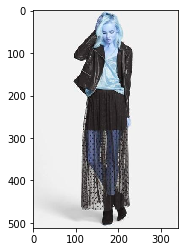

In [7]:
im = cv2.imread('img/img_00000035.jpg')
norm_image = im/255.0
plt.imshow(norm_image)
plt.show()

In [8]:
labels_128 = []
labels_128_n = []

for image in IMAGES_PATH:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    w,h,_ = np.shape(img)
    
    img = cv2.resize(img, (128, 128))
    X1, Y1, X2, Y2 = coordinates(image, w,h)
    labels_128.append([(X1), (Y1), (X2), (Y2)])
    labels_128_n.append([(X1)/128.0, (Y1)/128.0, (X2)/128.0, (Y2)/128.0])
    
    print(np.shape(img))
# #     Create figure and axes
#     fig,ax = plt.subplots(1)
#     # Display the image
#     ax.imshow(img)
#     # Create a Rectangle patch
#     rect = patches.Rectangle((X1,Y1), X2-X1, Y2-Y1,linewidth=1,edgecolor='r',facecolor='none')
    
#     # Add the patch to the Axes
#     ax.add_patch(rect)
#     plt.show()


['img/img_00000035.jpg', 93, 146, 250, 496]
(128, 128, 3)
['img/img_00000308.jpg', 92, 105, 228, 466]
(128, 128, 3)
['img/img_00000348.jpg', 21, 109, 244, 441]
(128, 128, 3)
['img/img_00000146.jpg', 64, 60, 184, 267]
(128, 128, 3)
['img/img_00000126.jpg', 1, 40, 184, 512]
(128, 128, 3)
['img/img_00000192.jpg', 1, 49, 346, 512]
(128, 128, 3)
['img/img_00000060.jpg', 114, 81, 160, 469]
(128, 128, 3)
['img/img_00000415.jpg', 127, 41, 199, 439]
(128, 128, 3)
['img/img_00000043.jpg', 24, 294, 253, 490]
(128, 128, 3)
['img/img_00000305.jpg', 165, 196, 287, 277]
(128, 128, 3)
['img/img_00000406.jpg', 3, 39, 177, 382]
(128, 128, 3)
['img/img_00000209.jpg', 90, 123, 269, 374]
(128, 128, 3)
['img/img_00000225.jpg', 63, 83, 292, 345]
(128, 128, 3)
['img/img_00000425.jpg', 106, 39, 191, 300]
(128, 128, 3)
['img/img_00000110.jpg', 1, 124, 440, 512]
(128, 128, 3)
['img/img_00000118.jpg', 134, 126, 220, 369]
(128, 128, 3)
['img/img_00000393.jpg', 1, 87, 384, 512]
(128, 128, 3)
['img/img_00000055.jpg'

['img/img_00000224.jpg', 14, 90, 146, 221]
(128, 128, 3)
['img/img_00000358.jpg', 47, 52, 132, 132]
(128, 128, 3)
['img/img_00000570.jpg', 93, 151, 225, 377]
(128, 128, 3)
['img/img_00000168.jpg', 67, 101, 231, 396]
(128, 128, 3)
['img/img_00000345.jpg', 107, 80, 261, 242]
(128, 128, 3)
['img/img_00000351.jpg', 157, 201, 407, 395]
(128, 128, 3)
['img/img_00000079.jpg', 74, 126, 256, 449]
(128, 128, 3)
['img/img_00000371.jpg', 73, 120, 247, 288]
(128, 128, 3)
['img/img_00000220.jpg', 1, 111, 280, 280]
(128, 128, 3)
['img/img_00000003.jpg', 41, 97, 244, 295]
(128, 128, 3)
['img/img_00000070.jpg', 57, 91, 202, 310]
(128, 128, 3)
['img/img_00000025.jpg', 1, 17, 354, 354]
(128, 128, 3)
['img/img_00000125.jpg', 116, 86, 244, 481]
(128, 128, 3)
['img/img_00000169.jpg', 9, 50, 145, 200]
(128, 128, 3)
['img/img_00000115.jpg', 66, 69, 241, 400]
(128, 128, 3)
['img/img_00000445.jpg', 1, 1, 330, 484]
(128, 128, 3)
['img/img_00000417.jpg', 1, 91, 349, 512]
(128, 128, 3)
['img/img_00000200.jpg', 148

['img/img_00000287.jpg', 1, 1, 512, 465]
(128, 128, 3)
['img/img_00000387.jpg', 108, 18, 203, 300]
(128, 128, 3)
['img/img_00000245.jpg', 85, 21, 159, 201]
(128, 128, 3)
['img/img_00000219.jpg', 96, 108, 187, 375]
(128, 128, 3)
['img/img_00000321.jpg', 48, 162, 184, 297]
(128, 128, 3)
['img/img_00000155.jpg', 88, 90, 348, 487]
(128, 128, 3)
['img/img_00000237.jpg', 154, 77, 332, 488]
(128, 128, 3)
['img/img_00000159.jpg', 72, 98, 203, 432]
(128, 128, 3)
['img/img_00000259.jpg', 92, 97, 330, 371]
(128, 128, 3)
['img/img_00000119.jpg', 34, 64, 234, 400]
(128, 128, 3)
['img/img_00000203.jpg', 1, 72, 341, 512]
(128, 128, 3)
['img/img_00000023.jpg', 152, 25, 262, 193]
(128, 128, 3)
['img/img_00000031.jpg', 90, 115, 307, 457]
(128, 128, 3)
['img/img_00000433.jpg', 105, 47, 221, 512]
(128, 128, 3)
['img/img_00000368.jpg', 77, 75, 199, 236]
(128, 128, 3)
['img/img_00000021.jpg', 66, 138, 247, 360]
(128, 128, 3)
['img/img_00000567.jpg', 153, 63, 232, 250]
(128, 128, 3)
['img/img_00000340.jpg', 

['img/img_00000130.jpg', 93, 76, 280, 500]
(128, 128, 3)
['img/img_00000440.jpg', 63, 54, 229, 385]
(128, 128, 3)
['img/img_00000260.jpg', 101, 80, 298, 424]
(128, 128, 3)
['img/img_00000011.jpg', 91, 111, 177, 309]
(128, 128, 3)
['img/img_00000112.jpg', 93, 64, 239, 512]
(128, 128, 3)
['img/img_00000436.jpg', 9, 71, 241, 512]
(128, 128, 3)
['img/img_00000301.jpg', 1, 231, 236, 346]
(128, 128, 3)
['img/img_00000103.jpg', 43, 51, 168, 182]
(128, 128, 3)
['img/img_00000239.jpg', 27, 98, 286, 505]
(128, 128, 3)
['img/img_00000414.jpg', 131, 56, 268, 464]
(128, 128, 3)
['img/img_00000446.jpg', 159, 57, 284, 386]
(128, 128, 3)
['img/img_00000590.jpg', 152, 94, 381, 512]
(128, 128, 3)
['img/img_00000478.jpg', 19, 42, 132, 224]
(128, 128, 3)
['img/img_00000282.jpg', 106, 170, 341, 512]
(128, 128, 3)
['img/img_00000033.jpg', 79, 129, 260, 477]
(128, 128, 3)
['img/img_00000238.jpg', 53, 39, 139, 250]
(128, 128, 3)
['img/img_00000411.jpg', 1, 1, 400, 300]
(128, 128, 3)
['img/img_00000384.jpg', 1

In [9]:
# BATCH_SIZE = 64
optimizer = Adam(lr=0.5e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#optimizer = SGD(lr=1e-4, decay=0.0005, momentum=0.9)
#optimizer = RMSprop(lr=1e-4, rho=0.9, epsilon=1e-08, decay=0.0)


GRID_H,  GRID_W  = 13 , 13
BOX              = 5
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

In [10]:
X_train = np.empty([501,128,128,3])
i=0



batch_images = []






for image in IMAGES_PATH :
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img = img/255.0
    X_train[i,:]=img
    i = i+1
    
print(np.shape(X_train))

(501, 128, 128, 3)


In [11]:
print(labels_128_n)
# label_128 = pd.DataFrame(labels_128)
# label_128 = tolist(label_128)
print('---------------------')

Y_train = np.asarray(labels_128)
print((Y_train[0]))

[[0.27192982456140352, 0.28515625, 0.73099415204678364, 0.96875], [0.26285714285714284, 0.205078125, 0.65142857142857147, 0.91015625], [0.073684210526315783, 0.22290388548057261, 0.85614035087719298, 0.90184049079754602], [0.25098039215686274, 0.13274336283185842, 0.72156862745098038, 0.59070796460176989], [0.0054054054054054057, 0.078125, 0.99459459459459465, 1.0], [0.002881844380403458, 0.095703125, 0.99711815561959649, 1.0], [0.38775510204081631, 0.158203125, 0.54421768707482998, 0.916015625], [0.42333333333333334, 0.093394077448747156, 0.66333333333333333, 1.0], [0.047244094488188976, 0.57421875, 0.49803149606299213, 0.95703125], [0.38106235565819863, 0.3828125, 0.66281755196304848, 0.541015625], [0.016129032258064516, 0.097500000000000003, 0.95161290322580649, 0.95499999999999996], [0.25714285714285712, 0.240234375, 0.76857142857142857, 0.73046875], [0.18260869565217391, 0.24057971014492754, 0.84637681159420286, 1.0], [0.35333333333333333, 0.13, 0.63666666666666671, 1.0], [0.00227

In [12]:
model = Sequential()



model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3), kernel_initializer=initializers.glorot_normal(seed=None)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


# model.add(Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer=initializers.glorot_normal(seed=None), kernel_constraint=max_norm(2.)))
# model.add(Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer=initializers.glorot_normal(seed=None), kernel_constraint=max_norm(2.)))
# model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer=initializers.glorot_normal(seed=None), kernel_constraint=max_norm(2.)))
# model.add(Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer=initializers.glorot_normal(seed=None), kernel_constraint=max_norm(2.)))
# model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
# model.add(Dense(1000 , activation='sigmoid', kernel_initializer=initializers.glorot_normal(seed=None), kernel_constraint=max_norm(2.)))
# model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.compile(optimizer= optimizer , loss=losses.mean_squared_error, metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 492036    
Total params: 494,596
Trainable params: 494,596
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, batch_size=64, epochs=1000, validation_split=0.3, verbose=1)

In [ ]:
model.save_weights('./Model/my_model.h5')

In [14]:
model.load_weights('./Model/my_model.h5')

In [15]:
score = model.evaluate(X_train, Y_train, verbose=1)

501/501 [==============================] - 1s 2ms/step


In [16]:
print('accuracy: ',score[1]*100)
print('loss: ',score[0])

accuracy:  78.0439122827
loss:  125.501294104


In [17]:
ttry = X_train[200]

ori = Y_train[200]

print(ori)
try1 = ttry.reshape(1,128,128,3)
prediction = model.predict(try1)

[  35.84         15.36         78.93333333  104.96      ]


In [18]:
print(prediction[0]
     )

[ 37.53183365  21.35133743  75.67984009  93.94506073]


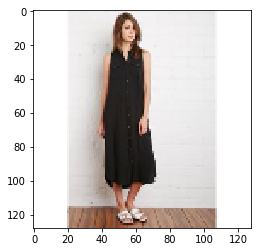

In [19]:
plt.imshow(ttry)

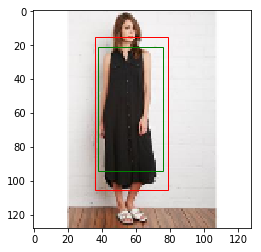

In [20]:
# Create figure and axes
fig,ax = plt.subplots(1)
    # Display the image
ax.imshow(ttry)
    # Create a Rectangle patch
rect1 = patches.Rectangle((prediction[0][0], prediction[0][1]), prediction[0][2]-prediction[0][0], prediction[0][3]-prediction[0][1] ,linewidth=1,edgecolor='g',facecolor='none')
rect2 = patches.Rectangle((ori[0], ori[1]), ori[2]-ori[0], ori[3]-ori[1] ,linewidth=1,edgecolor='r',facecolor='none')
    
    # Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()
